# Rare barrier-crossing events in a double-well potential

In this notebook we study the dynamics of a particle evolving in a symmetric double-well potential to introduce the concepts of rare-event dynamics and transition-state theory.

The double-well potential has the form:

$$
V(x) = a x^4 - b x^2 + C ,
$$

where we choose the constant $C$ so that both minima are exactly at zero energy.
The barrier height is then $V_\mathrm{barrier} = b^2 / (4a)$.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Here we set the parameters and define the potential and its derivative

In [23]:
# Double-well potential parameters
a = 1.0
b = 4.0

V_shift = b*b/(4*a)

def V(x):
    return a*x**4 - b*x**2 + V_shift

def dVdx(x):
    return 4*a*x**3 - 2*b*x

m = 1.0               # mass
kT = 1.0              # thermal energy
nu = 1.0              # Andersen collision frequency (controls coupling strength)
dt = 0.002            # time step
steps = 200_000       # simulation length
sigma_v = np.sqrt(kT/m)

x = np.zeros(steps)
v = np.zeros(steps)

x[0] = -2.0           # start in left well
v[0] = 0.0

Here we generate the trajectory by using the Velocity Verlet integration algorithm, coupled to a simple Andersen thermostat

In [27]:
rng = np.random.default_rng()

for i in range(steps - 1):

    # --- Velocity Verlet ---
    # first step
    v_half = v[i] - 0.5 * dt * dVdx(x[i]) / m

    # position integration
    x[i+1] = x[i] + dt * v_half

    # second step
    v_new = v_half - 0.5 * dt * dVdx(x[i+1]) / m

    # --- Andersen thermostat randomization ---
    if rng.random() < nu * dt:
        v_new = rng.normal(0, sigma_v)

    v[i+1] = v_new


Now we plot the energy as a function of time

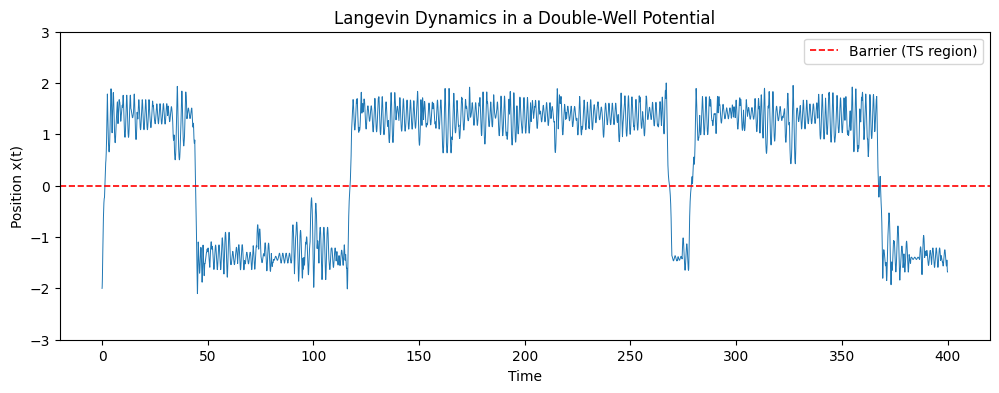

In [28]:
plt.figure(figsize=(12,4))
plt.plot(np.arange(steps)*dt, x, lw=0.7)
plt.axhline(0.0, color='red', ls='--', lw=1.2, label='Barrier (TS region)')
plt.ylim(-3, 3)
plt.xlabel("Time")
plt.ylabel("Position x(t)")
plt.title("Langevin Dynamics in a Double-Well Potential")
plt.legend()
plt.show()

And then prepare an animation showing the position of the particle as a function of time using the trajectory we just generated.

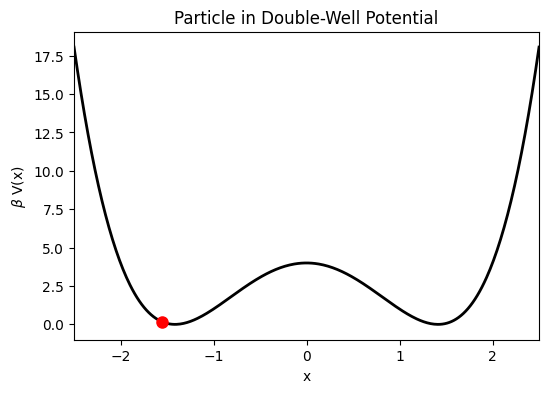

In [34]:
# Create grid for potential
xmin = -2.5
xmax = 2.5
xs = np.linspace(xmin, xmax, 400)
betaVs = V(xs) / kT

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(xs, betaVs, 'k', lw=2)
particle, = ax.plot([], [], 'ro', ms=8)
ax.set_xlim(xmin, xmax)
ax.set_ylim(min(betaVs)-1, max(betaVs)+1)
ax.set_xlabel('x')
ax.set_ylabel(r'$\beta$ V(x)')
ax.set_title('Particle in Double-Well Potential')

def init():
    particle.set_data([], [])
    return particle,

def update(frame):
    particle.set_data(x[frame], V(x[frame]) / kT)
    return particle,

anim = FuncAnimation(fig, update, frames=np.arange(0, steps, 1000),
                     init_func=init, blit=True)

HTML(anim.to_jshtml())